In [167]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(scran)
    library(scater)
    library(Seurat)
})

In [2]:
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_analysed.rds")

# Get CAF signatures

In [40]:
keep <- rowData(sce)$Biotype == 'protein_coding'
markers <- findMarkers(sce, sce$celltype, lfc = 0, subset.row = keep)
markers_caf <- markers[["CAF_C01-FAP"]]
markers_caf <- as.data.frame(markers_caf) %>% rownames_to_column("gene")
caf_signature1 <- markers_caf %>% 
    filter_at(vars(starts_with("logFC")), all_vars(. > 1)) %>% filter(FDR < 0.01)


markers_caf <- markers[["CAF_C02-CD36"]]
markers_caf <- as.data.frame(markers_caf) %>% rownames_to_column("gene")
caf_signature2 <- markers_caf %>% 
    filter_at(vars(starts_with("logFC")), all_vars(. > 1)) %>% filter(FDR < 0.01)

In [86]:
sce <- sce[rowData(sce)$Biotype == 'protein_coding',]
keep <- calculateAverage(sce) > 1
sce <- logNormCounts(sce[keep,])
sub <-  sce[, grepl("^CAF", sce$celltype)]
markers <- findMarkers(sub, groups = sub$celltype, direction = 'up', lfc = 1)
genes_of_interest = markers[['CAF_C01-FAP']]
genes_of_interest <- rownames(genes_of_interest)[genes_of_interest$FDR < 0.1]

In [87]:
genes_of_interest

[1] "DCN"      "LUM"      "THBS2"    "C7"       "EFEMP1"   "COL1A1"  
  [7] "MFAP4"    "CCDC80"   "VCAN"     "RARRES2"  "ENG"      "LAMA2"   
 [13] "FMOD"     "ISLR"     "CTSK"     "ABI3BP"   "FBLN5"    "SPON2"   
 [19] "C1S"      "CFH"      "SERPINF1" "COL6A1"   "OLFML3"   "AEBP1"   
 [25] "CXCL12"   "PLXDC2"   "MATN2"    "COL6A3"   "PDGFRA"   "FBLN2"   
 [31] "PODN"     "QSOX1"    "BICC1"    "COL3A1"   "MAPK7"    "MMP2"    
 [37] "LRP1"     "PLTP"     "ALDH1A3"  "GPC3"     "SVEP1"    "NGFR"    
 [43] "PRELP"    "COL1A2"   "COL15A1"  "PCDHGC3"  "ITGA11"   "NPC2"    
 [49] "OGN"      "CYP1B1"   "CCL2"     "EMILIN1"  "ANGPTL2"  "PRNP"    
 [55] "MRC2"     "MXRA5"    "LTBP4"    "C1R"      "SLIT2"    "SERPINE2"
 [61] "FLRT2"    "PMP22"    "RRBP1"    "LTBP2"    "MOXD1"    "ABCA8"   
 [67] "FSTL1"    "IGFBP3"   "TMEM176B" "COL14A1"  "GPNMB"    "LTBP1"   
 [73] "PCOLCE"   "ABCA6"    "COL6A2"   "HTRA3"    "NNMT"     "INMT"    
 [79] "MMP19"    "C1RL"     "EFEMP2"   "SRPX"     "THBS1"    "CCL21"   
 [85] "DAAM1"    "COL16A1"  "HLA-DRB1" "CYBRD1"   "FAP"      "FBLN1"   
 [91] "COL8A1"   "DEPTOR"   "COL5A1"   "FGFR1"    "MPZL1"    "HSD11B1" 
 [97] "CPXM1"    "GGT5"     "VCAM1"    "TMEM176A" "TPP1"     "DAB2"    
[103] "TMEM119"  "PLOD2"    "LPAR1"    "FBN1"     "DPT"      "ADAMTSL2"
[109] "PTGIS"    "HMCN1"    "G0S2"     "GLT8D2"   "PTGDS"    "FMO2"    
[115] "TNFSF13B" "C3"       "S100A10"  "SLCO2B1"  "HLA-DRB5" "PROS1"   
[121] "SPON1"    "CD74"     "SULF2"    "TIMP2"    "TNXB"     "DUSP6"   
[127] "ZFP36L2"  "S100A6"   "FGF7"     "RCN3"     "CD302"    "DAPK1"   
[133] "MXRA8"    "DSE"      "POSTN"    "EPHA3"    "PCDHGA4"  "OMD"     
[139] "ADH1B"    "B4GALT1"  "CYR61"    "APOE"     "SRPX2"    "CCL19"   
[145] "TIMP1"    "CHST15"

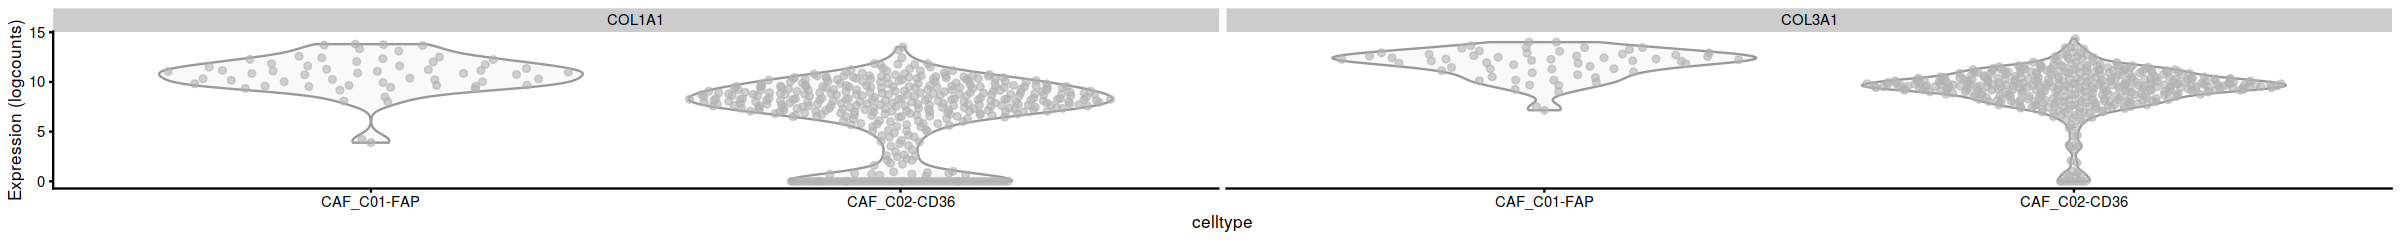

In [168]:
plotExpression(sub, x = "celltype", features = c("COL1A1", "COL3A1"))

In [90]:
genes_of_interest2 = markers[['CAF_C02-CD36']]
genes_of_interest2 <- rownames(genes_of_interest2)[genes_of_interest2$FDR < 0.1]

# Public CAF signatures

In [ ]:
caf_brca <- sapply(as.list(readxl::read_xlsx("../../data/reference/signatures/CAF_signatures.xlsx", sheet = 2, skip = 1)), function(x) x[!is.na(x)])
caf_pdac <- sapply(as.list(readxl::read_xlsx("../../data/reference/signatures/CAF_signatures.xlsx", sheet = 3, skip = 0)), function(x) x[!is.na(x)])
caf_icc <- sapply(as.list(readxl::read_xlsx("../../data/reference/signatures/CAF_signatures.xlsx", sheet = 4, skip = 0)), function(x) x[!is.na(x)])                   

In [59]:
caf_signatures_df <- bind_rows(stack(caf_brca), stack(caf_pdac), stack(caf_icc)) %>% 
    dplyr::rename(gene = values, gs_term = ind) %>%
    dplyr::select(gs_term, gene) %>%
    as.data.frame()


In [98]:
ov_genes <- intersect(rownames(sce), unique(caf_signatures_df$gene))

In [104]:
caf_signatures_df <- caf_signatures_df %>% filter( gene %in% ov_genes)

In [129]:
table(caf_signatures_df$gs_term)


        ecm-myCAF        detox-iCAF           IL-iCAF        TGFβ-myCAF 
               28                22                26                22 
      wound-myCAF         IFNγ-iCAF            CAF-S1 Normal Fibroblast 
               24                21                59                91 
             iCAF             myCAF            PanCAF               HSC 
               10                 6                 8                17 
               PF          TumorICC         HumaniCAF        HumanMyCAF 
                1                 2                19                20 
      HumanMesCAF 
               38 

In [130]:
caf_signatures_df <- caf_signatures_df %>% filter(!gs_term %in% c("TumorICC", "PF"))

In [159]:
caf_signatures_df <- caf_signatures_df %>% filter(gs_term %in% c("CAF-S1", "Normal Fibroblast", 
                                             "iCAF", 'myCAF'))

In [160]:
avg <- sumCountsAcrossCells(sce, ids = sce$celltype,  subset.row = caf_signatures_df$gene,  assay.type = 'logcounts', average = T)
avg <- assay(avg)
avg <- avg - rowMeans(avg)

In [161]:
ha <- HeatmapAnnotation(df = caf_signatures_df[, "gs_term", drop = F])

In [164]:
avg <- avg[, grep("CAF|VSMC", colnames(avg))]

In [180]:
options(repr.plot.height = 3, repr.plot.width = 20)
pdf("../figures/SupplementaryFigure4/S4D_Heatmap_CAF_signatures_expression.pdf", height = 3, width = 16)
Heatmap(t(avg), name = "Normalized Expr.", column_split = caf_signatures_df$gs_term, cluster_rows = T, top_annotation = ha, 
        clustering_method_columns  = "ward.D2",
        clustering_method_rows = "ward.D2", column_title_rot = 0, border = T,
        show_column_dend = F, show_row_dend = F, show_column_names = T, show_row_names = T)
dev.off()

png 
  2

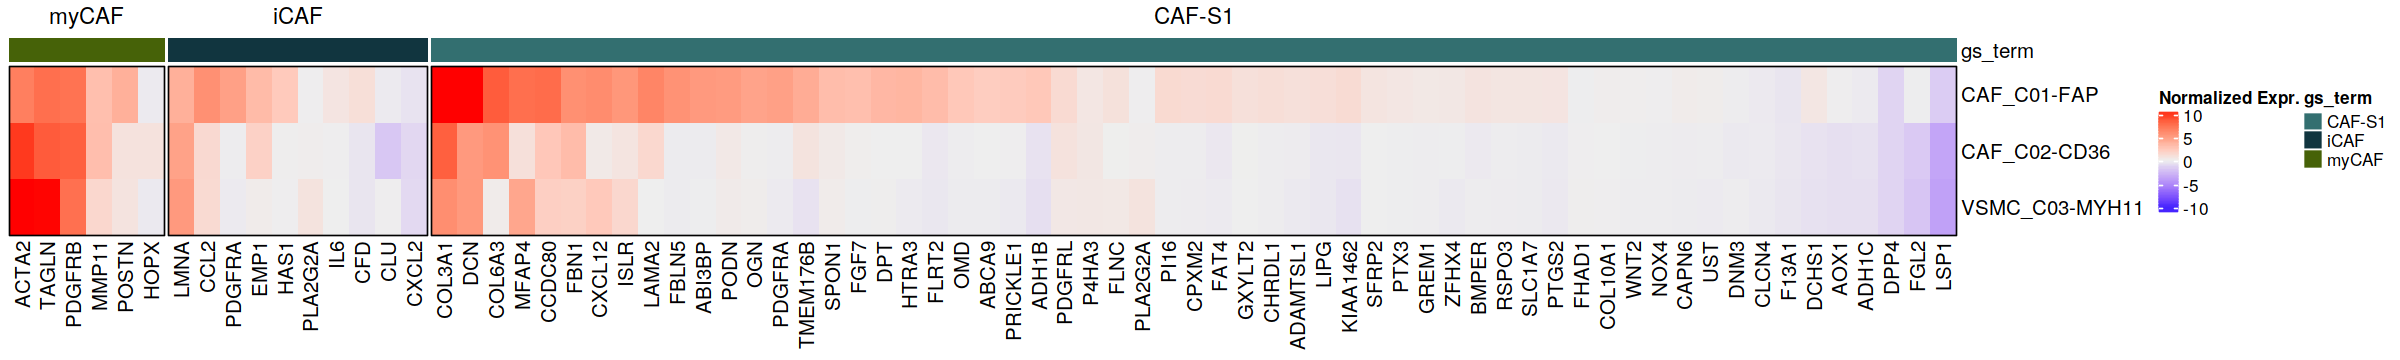

In [181]:
Heatmap(t(avg), name = "Normalized Expr.", column_split = caf_signatures_df$gs_term, cluster_rows = T, top_annotation = ha, 
        clustering_method_columns  = "ward.D2",
        clustering_method_rows = "ward.D2", column_title_rot = 0, border = T,
        show_column_dend = F, show_row_dend = F, show_column_names = T, show_row_names = T)

In [146]:
library(clusterProfiler)
res <- enricher(gene = genes_of_interest, TERM2GENE = caf_signatures_df)
res@result

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HumanMyCAF,HumanMyCAF,HumanMyCAF,13/58,20/308,2.987922e-06,3.884299e-05,2.516145e-05,LUM/COL1A1/VCAN/ISLR/SPON2/SERPINF1/COL6A3/COL3A1/COL1A2/CYP1B1/COL5A1/PTGDS/POSTN,13
CAF-S1,CAF-S1,CAF-S1,22/58,59/308,1.406937e-04,9.145088e-04,5.923944e-04,DCN/MFAP4/CCDC80/LAMA2/ISLR/ABI3BP/FBLN5/CXCL12/COL6A3/PDGFRA/PODN/COL3A1/OGN/FLRT2/TMEM176B/HTRA3/FBN1/DPT/SPON1/FGF7/OMD/ADH1B,22
wound-myCAF,wound-myCAF,wound-myCAF,11/58,24/308,1.462886e-03,6.339174e-03,4.106347e-03,DCN/CCDC80/RARRES2/FBLN2/COL3A1/OGN/COL14A1/COL8A1/TMEM119/DPT/OMD,11
detox-iCAF,detox-iCAF,detox-iCAF,9/58,22/308,1.074714e-02,3.492820e-02,2.262555e-02,DCN/C7/FBLN5/CXCL12/OGN/CCL2/TNXB/FGF7/ADH1B,9
IFNγ-iCAF,IFNγ-iCAF,IFNγ-iCAF,8/58,21/308,2.631583e-02,6.842115e-02,4.432139e-02,C7/ABI3BP/CYP1B1/CCL2/EMILIN1/GGT5/VCAM1/CCL19,8
ecm-myCAF,ecm-myCAF,ecm-myCAF,9/58,28/308,5.665029e-02,1.227423e-01,7.950918e-02,CCDC80/ISLR/COL6A3/COL3A1/COL14A1/COL8A1/CPXM1/FBN1/SPON1,9
HSC,HSC,HSC,5/58,17/308,1.979298e-01,3.675840e-01,2.381111e-01,DCN/LUM/SERPINF1/EMILIN1/COL14A1,5
IL-iCAF,IL-iCAF,IL-iCAF,6/58,26/308,3.605312e-01,5.858632e-01,3.795066e-01,C7/FBLN5/CXCL12/CCL2/VCAM1/FMO2,6
HumanMesCAF,HumanMesCAF,HumanMesCAF,8/58,38/308,4.260044e-01,6.153397e-01,3.986006e-01,EFEMP1/CCDC80/MXRA5/SERPINE2/PTGIS/C3/S100A10/S100A6,8


In [91]:
library(clusterProfiler)
res <- enricher(gene = genes_of_interest2, TERM2GENE = caf_signatures_df)
res@result

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HumaniCAF,HumaniCAF,HumaniCAF,9/26,20/416,3.639060e-07,1.819530e-06,1.149177e-06,HIGD1B/GJA4/NDUFA4L2/CPE/ADAMTS4/ISYNA1/MAP1B/ARHGDIB/GPX3,9
HSC,HSC,HSC,4/26,18/416,2.018355e-02,5.045888e-02,3.186877e-02,NDUFA4L2/NOTCH3/SEPT4/FRZB,4
Normal Fibroblast,Normal Fibroblast,Normal Fibroblast,12/26,131/416,7.698884e-02,1.283147e-01,8.104089e-02,COX4I2/CD36/HIGD1B/ATP1A2/CDH6/ESAM/PPARG/FAM162B/SLC2A4/EBF2/KCNAB1/SCN4B,12
IFNγ-iCAF,IFNγ-iCAF,IFNγ-iCAF,1/26,22/416,7.673546e-01,8.986864e-01,5.675914e-01,EGFLAM,1
wound-myCAF,wound-myCAF,wound-myCAF,1/26,34/416,8.986864e-01,8.986864e-01,5.675914e-01,PTGER3,1


In [157]:
library(clusterProfiler)
res <- enricher(gene = caf_signature1$gene, TERM2GENE = caf_signatures_df)
res@result

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HumanMyCAF,HumanMyCAF,HumanMyCAF,10/30,20/115,0.01042444,0.05212221,0.04389239,COL6A3/COL1A2/COL3A1/LUM/COL1A1/COL5A1/ISLR/CYP1B1/POSTN/CTHRC1,10
HSC,HSC,HSC,6/30,17/115,0.25576527,0.63933642,0.53838857,DCN/LUM/COL14A1/COLEC11/GEM/EMILIN1,6
CAF-S1,CAF-S1,CAF-S1,16/30,59/115,0.48197186,0.63933642,0.53838857,COL6A3/DCN/COL3A1/CCDC80/LAMA2/MFAP4/ISLR/ABI3BP/PDGFRA/PODN/OGN/HTRA3/SPON1/DPT/OMD/FGF7,16
iCAF,iCAF,iCAF,3/30,10/115,0.51146914,0.63933642,0.53838857,PDGFRA/CCL2/HAS1,3
HumaniCAF,HumaniCAF,HumaniCAF,3/30,19/115,0.92602728,0.92602728,0.77981245,COLEC11/GEM/CCL21,3


In [67]:
res <- enricher(gene = caf_signature2$gene, TERM2GENE = caf_signatures_df)
res@result

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HumaniCAF,HumaniCAF,HumaniCAF,3/11,20/416,0.01228992,0.06144961,0.03881028,NDUFA4L2/CPE/HIGD1B,3
Normal Fibroblast,Normal Fibroblast,Normal Fibroblast,7/11,131/416,0.02661838,0.06654594,0.04202901,COX4I2/STEAP4/FAM162B/HIGD1B/ECM2/EBF2/SCN4B,7
HSC,HSC,HSC,1/11,18/416,0.38899500,0.53984405,0.34095414,NDUFA4L2,1
IFNγ-iCAF,IFNγ-iCAF,IFNγ-iCAF,1/11,22/416,0.45402957,0.53984405,0.34095414,PLXDC1,1
TGFβ-myCAF,TGFβ-myCAF,TGFβ-myCAF,1/11,28/416,0.53984405,0.53984405,0.34095414,THBS4,1


In [68]:
library(fgsea)

In [ ]:
caf_signatures_list <- split(x = caf_signatures_df$gene, f = caf_signatures_df$gs_term)

res_gsea <- fgsea(pathways = caf_signatures_list, ...)

# Signatures score

In [75]:
sr <- as.Seurat(sce[, grepl("^CAF", sce$celltype)])

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [76]:
sr <- Seurat::AddModuleScore(sr, features = caf_brca, name = names(caf_brca))
sr <- Seurat::AddModuleScore(sr, features = caf_icc, name = names(caf_icc))
sr <- Seurat::AddModuleScore(sr, features = caf_pdac, name = names(caf_pdac))

Warning message:
“The following features are not present in the object: PLPP4, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: PLPP3, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: GALNTL2, LOC100288077, LOC255480, KIAA1199, LOC728640, C3orf55, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: KRT222, not searching for symbol synonyms”
Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is ecm.myCAF1detox.iCAF2IL.iCAF3TGFβ.myCAF4wound.myCAF5IFNγ.iCAF6CAF.S17Normal.Fibroblast8; see ?make.names for more details on syntax validity”
Warning message:
“The following features are not present in the object: RGS5, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: SLP1, not searching for symbol synonyms”
Warning message:
“

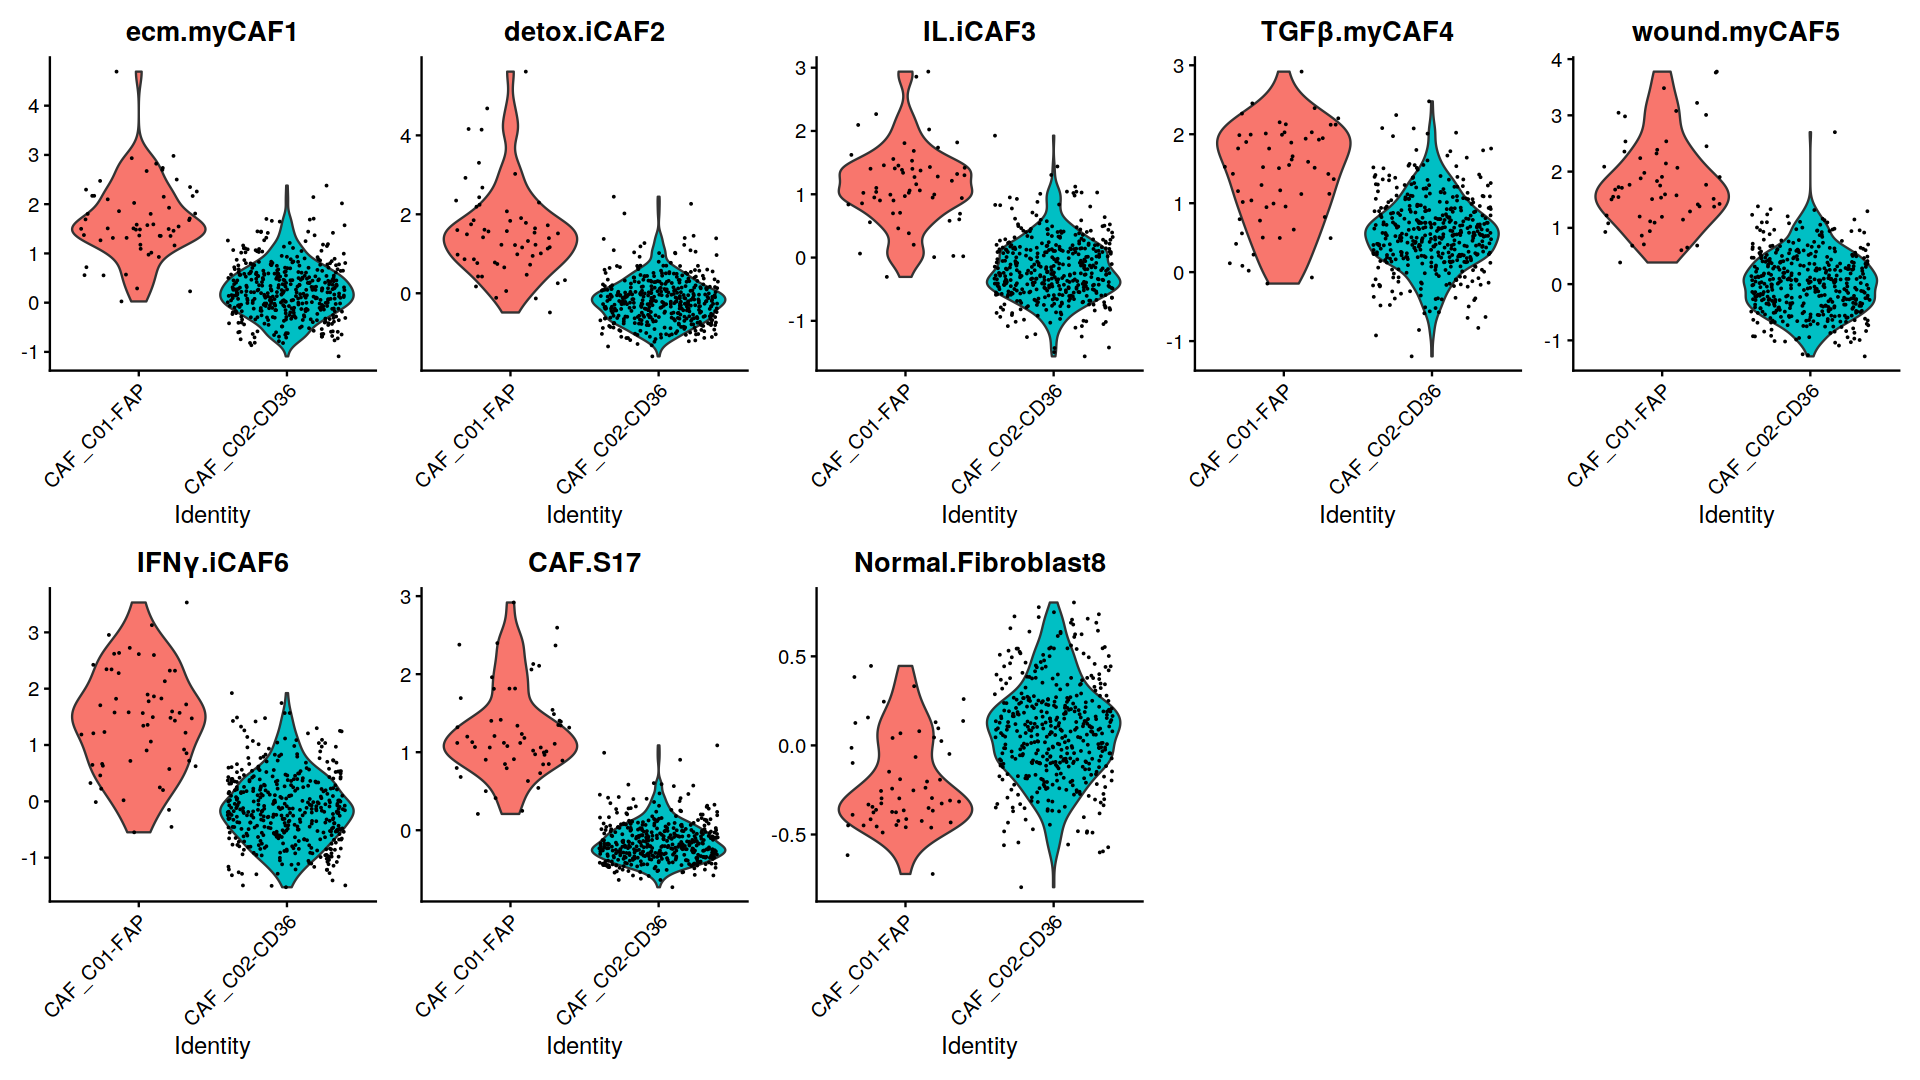

In [83]:
options(repr.plot.height = 9, repr.plot.width = 16)
VlnPlot(sr, ncol = 5, features = c('ecm.myCAF1', 'detox.iCAF2', 'IL.iCAF3', 'TGFβ.myCAF4',
                         'wound.myCAF5', 'IFNγ.iCAF6', 'CAF.S17', 'Normal.Fibroblast8'), group.by = 'celltype')

In [175]:
options(repr.plot.height = 5, repr.plot.width = 6)

p <- VlnPlot(sr, ncol = 2, features = c('CAF.S17', 'iCAF1'), group.by = 'celltype')

In [177]:
ggsave(p, filename = "../figures/Figure2/2F_Violin_CAF_signatures.pdf")

Saving 6.67 x 6.67 in image



Warning message in FetchData(object = object, vars = features, slot = slot):
“The following requested variables were not found: PanCAF8”


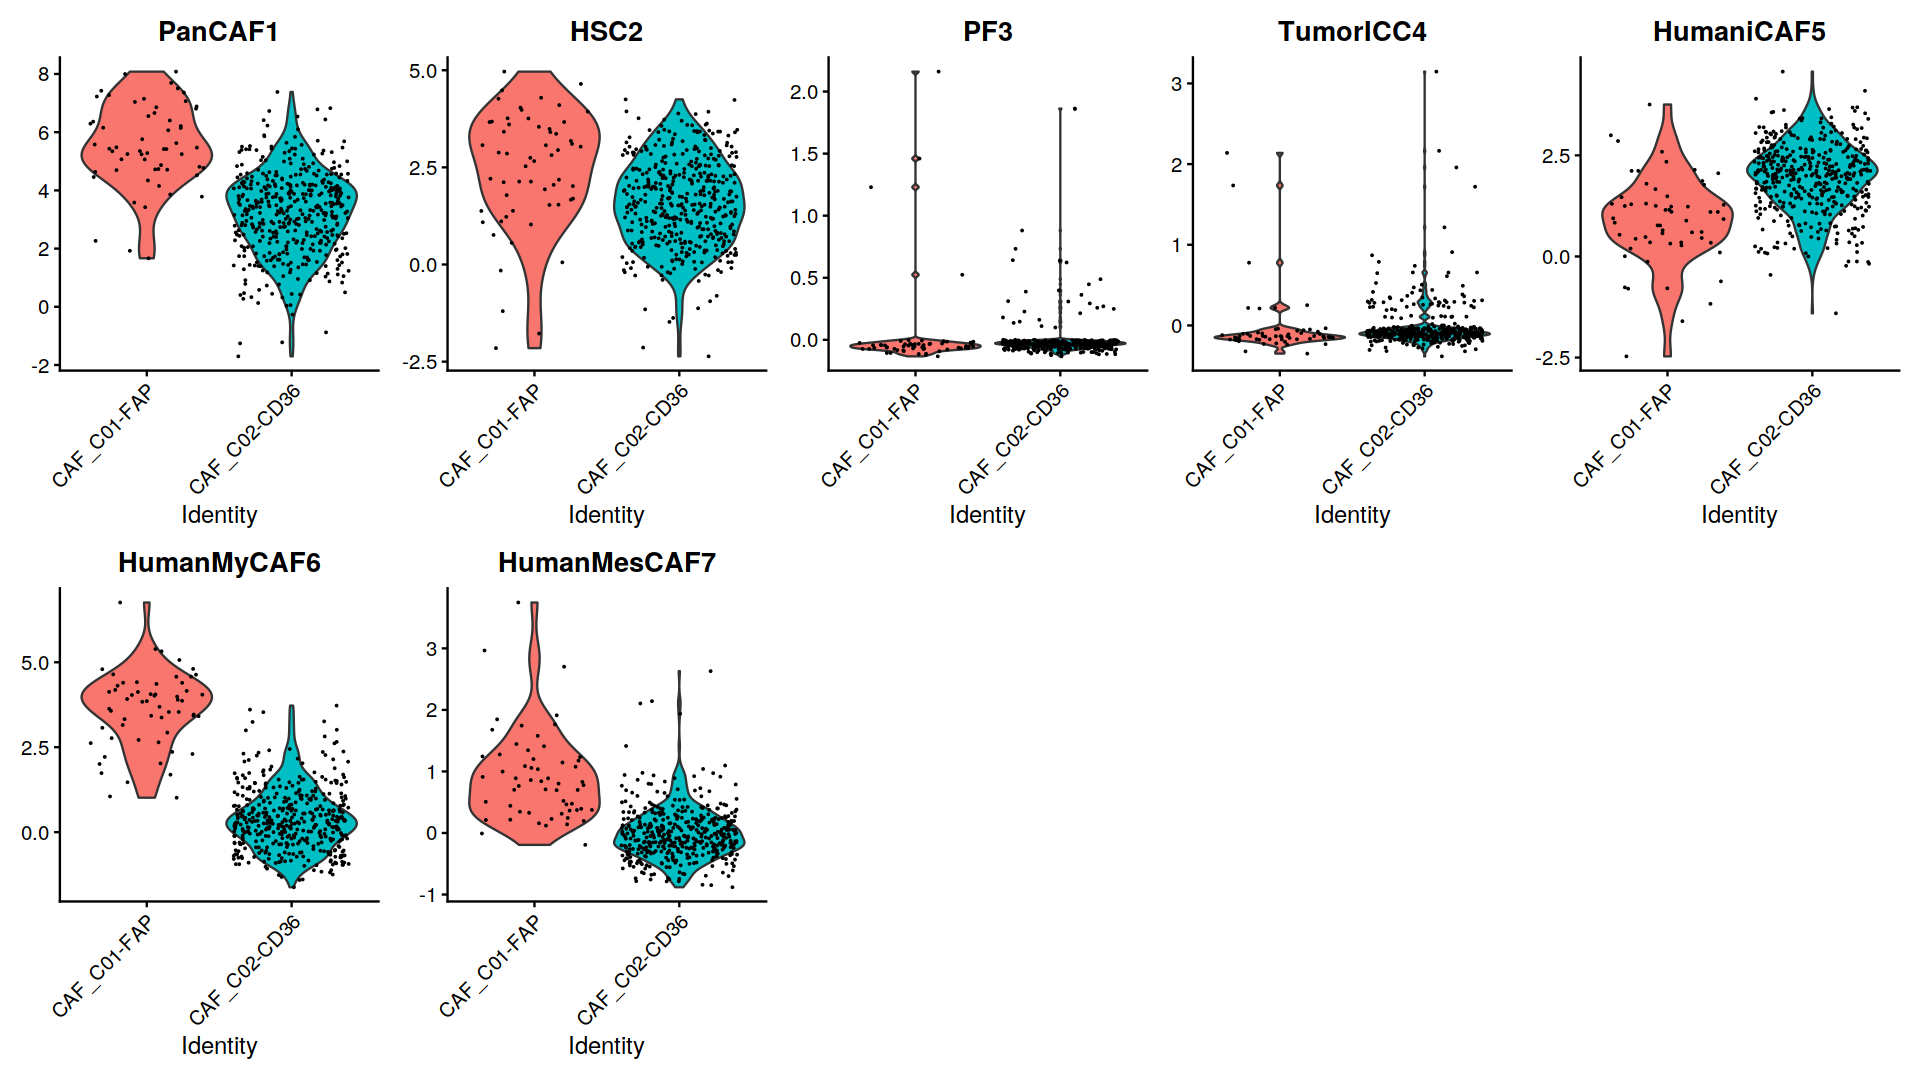

In [84]:
VlnPlot(object = sr,  ncol = 5,  group.by = 'celltype',
        features = c('PanCAF1','HSC2','PF3','TumorICC4', 'HumaniCAF5', 'HumanMyCAF6', 'HumanMesCAF7','PanCAF8'))


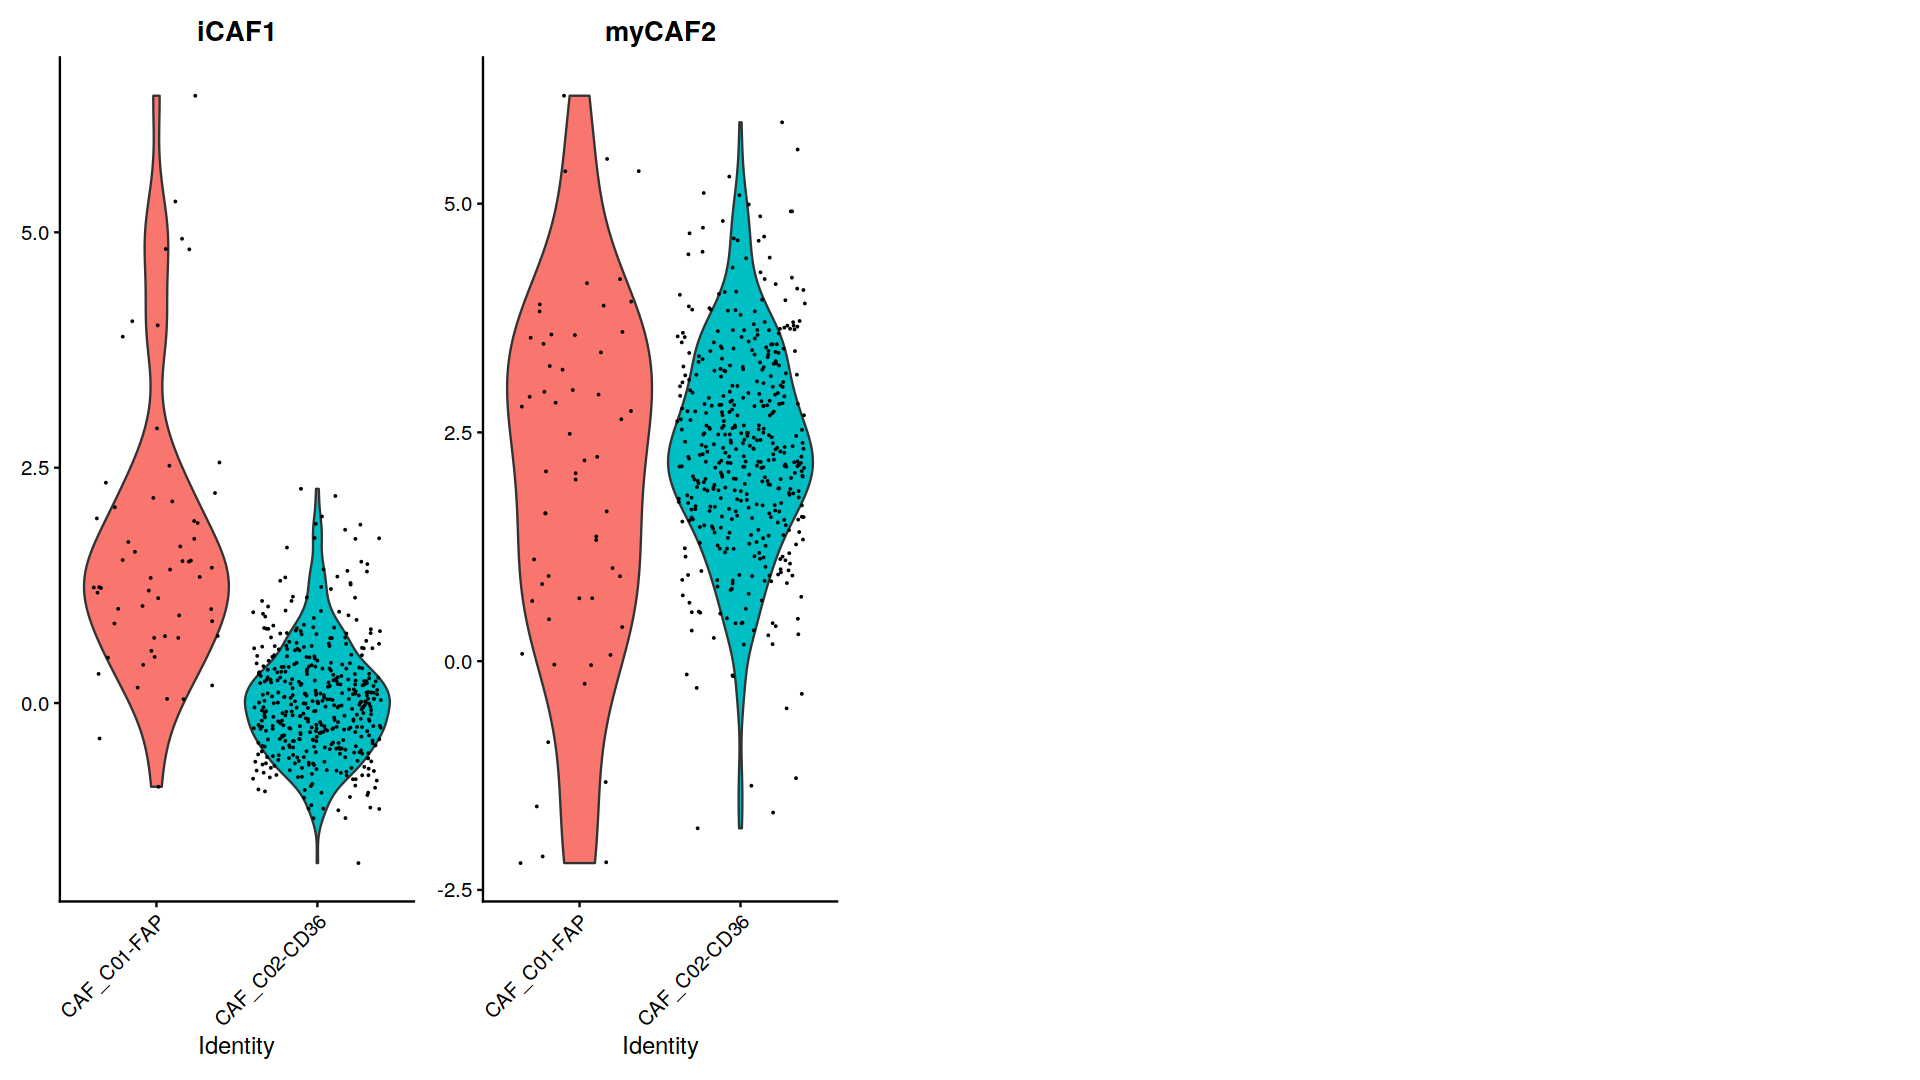

In [85]:
VlnPlot(object = sr,  ncol = 5,  group.by = 'celltype',
        features = c('iCAF1','myCAF2'))


In [81]:
names(sr@meta.data)

[1] "orig.ident"             "nCount_originalexp"     "nFeature_originalexp"  
 [4] "cell.id"                "cell.type"              "tissue"                
 [7] "facs"                   "donor"                  "isHBV"                 
[10] "isHCV"                  "histology"              "ExonicReads"           
[13] "ExonicReadsPer"         "IntronicReads"          "IntronicReadsPer"      
[16] "IntergenicReads"        "IntergenicReadsPer"     "sum"                   
[19] "detected"               "subsets_mito_sum"       "subsets_mito_detected" 
[22] "subsets_mito_percent"   "subsets_HBV_sum"        "subsets_HBV_detected"  
[25] "subsets_HBV_percent"    "total"                  "Sample"                
[28] "sizeFactor"             "leiden_global"          "leiden_global_celltype"
[31] "old_anno"               "celltype"               "UMAP1.MES"             
[34] "UMAP2.MES"              "UMAP1.EPI"              "UMAP2.EPI"             
[37] "UMAP1.MYE"              "UMAP2.MYE"              "UMAP1.TNK"             
[40] "UMAP2.TNK"              "UMAP1.ENDO"             "UMAP2.ENDO"            
[43] "ecm.myCAF1"             "detox.iCAF2"            "IL.iCAF3"              
[46] "TGFβ.myCAF4"            "wound.myCAF5"           "IFNγ.iCAF6"            
[49] "CAF.S17"                "Normal.Fibroblast8"     "PanCAF1"               
[52] "HSC2"                   "PF3"                    "TumorICC4"             
[55] "HumaniCAF5"             "HumanMyCAF6"            "HumanMesCAF7"          
[58] "iCAF1"                  "myCAF2"

In [158]:
caf_icc

$PanCAF
[1] "COL1A1"   "COL1A2"   "COL3A1"   "C1S"      "ACTA2"    "C1R"      "SERPINF1"
[8] "PDGFRB"  

$HSC
 [1] "RGS5"     "LUM"      "COLEC11"  "TAGLN"    "CYGB"     "EDNRA"   
 [7] "EMILIN1"  "FOXS1"    "FRZB"     "GEM"      "HEYL"     "NDUFA4L2"
[13] "NOTCH3"   "PDGFRB"   "SEPT4"    "SERPINF1" "COL14A1"  "DCN"     

$PF
[1] "MSLN"  "UPK1B" "KRT19" "SLP1" 

$TumorICC
[1] "KRT19" "EPCAM"

$HumaniCAF
 [1] "ADAMTS4"  "AGT"      "APOE"     "ARHGDIB"  "CCL19"    "CCL21"   
 [7] "COLEC11"  "CPE"      "GEM"      "GJA4"     "GPX3"     "HIGD1B"  
[13] "IL6"      "ISYNA1"   "LHFP"     "MAP1B"    "MT1A"     "NDUFA4L2"
[19] "PDK4"     "RGS5"    

$HumanMyCAF
 [1] "APOD"     "CCL11"    "COL1A1"   "COL1A2"   "COL3A1"   "COL5A1"  
 [7] "COL6A3"   "CTGF"     "CTHRC1"   "CYP1B1"   "FN1"      "INHBA"   
[13] "ISLR"     "LUM"      "MMP14"    "POSTN"    "PTGDS"    "SERPINF1"
[19] "SFRP2"    "SPON2"    "VCAN"    

$HumanMesCAF
 [1] "ANXA1"         "ANXA2"         "BDKRB1"        "C19orf33"     
 [5] "C3"            "CALB2"         "CCDC80"        "CFB"          
 [9] "CRABP2"        "CXCL1"         "CXCL6"         "EFEMP1"       
[13] "EGFL6"         "EMP3"          "EZR"           "HMOX1"        
[17] "HP"            "HSPA6"         "IFI27"         "IGFBP6"       
[21] "ITLN1"         "KRT18"         "KRT19"         "KRT8"         
[25] "LINC01133"     "LOX"           "MT1E"          "MT1G"         
[29] "MT1X"          "MXRA5"         "PDPN"          "PLA2G2A"      
[33] "PRG4"          "PRSS23"        "PTGIS"         "RP11-572C15.6"
[37] "S100A10"       "S100A16"       "S100A6"        "SAA1"         
[41] "SAA2"          "SERPINE2"      "SH3BGRL3"      "SLC12A8"      
[45] "SLPI"          "TM4SF1"

In [14]:
caf_pdac

$iCAF
 [1] "IL6"     "PDGFRA"  "CFD"     "PLA2G2A" "HAS1"    "CXCL2"   "CCL2"   
 [8] "CLU"     "EMP1"    "LMNA"   

$myCAF
[1] "TAGLN"  "ACTA2"  "MMP11"  "PDGFRB" "HOPX"   "POSTN"

In [16]:
caf_brca

$`ecm-myCAF`
 [1] "ASPN"    "COL3A1"  "THY1"    "SFRP2"   "COL10A1" "COL6A3"  "LRRC17" 
 [8] "CILP"    "GRP"     "ITGBL1"  "COL8A1"  "COL14A1" "ADAM12"  "OLFML2B"
[15] "ELN"     "PLPP4"   "CREB3L1" "FBN1"    "LOXL1"   "MATN3"   "LRRC15" 
[22] "COMP"    "ISLR"    "P3H1"    "COL11A1" "SEPT11"  "NBL1"    "SPON1"  
[29] "SULF1"   "FNDC1"   "CNN1"    "MIAT"    "MMP23B"  "CPXM1"   "FIBIN"  
[36] "P4HA3"   "GXYLT2"  "CILP2"   "P3H4"    "CCDC80" 

$`detox-iCAF`
 [1] "ADH1B"    "C7"       "CXCL12"   "TNXB"     "RSPO3"    "DCN"     
 [7] "C16orf89" "GDF10"    "PAMR1"    "FXYD1"    "ZBTB16"   "SLIT3"   
[13] "HSPB6"    "IL6"      "FBLN5"    "OGN"      "PLA2G2A"  "CHRDL1"  
[19] "CYGB"     "FGF7"     "PI16"     "PLAC9"    "WISP2"    "PTX3"    
[25] "CCL2"     "CXCL3"   

$`IL-iCAF`
 [1] "ITM2A"       "CXCL12"      "FIGF"        "FXYD1"       "PLPP3"      
 [6] "TNFRSF10D"   "CTB-92J24.3" "LAMC3"       "C7"          "ZBTB16"     
[11] "CAPN6"       "SCARA5"      "DLK1"        "MEG3"        "TAC1"       
[16] "THUMPD3-AS1" "GMFG"        "CYGB"        "CCL8"        "VCAM1"      
[21] "FMO2"        "FBLN5"       "COLEC12"     "PDGFD"       "GADD45G"    
[26] "SNAI1"       "LSP1"        "CCL2"        "IL6"         "PTGS2"      
[31] "NR2F1"       "F10"         "CEBPA"       "KDM6B"       "PID1"       

$`TGFβ-myCAF`
 [1] "CST1"    "LAMP5"   "LOXL1"   "EDNRA"   "TGFB1"   "TGFB3"   "TNN"    
 [8] "CST2"    "HES4"    "COL10A1" "ELN"     "THBS4"   "NKD2"    "OLFM2"  
[15] "COL6A3"  "LRRC17"  "COL3A1"  "THY1"    "HTRA3"   "TMEM204" "SEPT11" 
[22] "COMP"    "TNFAIP6" "ID4"     "GGT5"    "INAFM1"  "CILP"    "OLFML2B"

$`wound-myCAF`
 [1] "SFRP4"   "CCDC80"  "OGN"     "DCN"     "PTGER3"  "SFRP2"   "PDGFRL" 
 [8] "SMOC2"   "MMP23B"  "CPXM2"   "COL14A1" "ITGBL1"  "WISP2"   "CILP2"  
[15] "COL8A1"  "GAS1"    "COL3A1"  "OMD"     "COL11A1" "CILP"    "NEXN"   
[22] "ASPN"    "RARRES2" "FIBIN"   "TMEM119" "KERA"    "ID4"     "GRP"    
[29] "COMP"    "DPT"     "ELN"     "FBLN2"   "IGF1"    "IGF2"   

$`IFNγ-iCAF`
 [1] "CCL19"   "VCAM1"   "RBP5"    "CYP1B1"  "C7"      "TNFRSF4" "CXCL13" 
 [8] "CXCL9"   "CCL2"    "IL34"    "ABI3BP"  "CYP7B1"  "F10"     "COLEC12"
[15] "CXCL10"  "EMILIN1" "GGT5"    "EGFLAM"  "PLXDC1"  "CXCL11"  "CCL8"   
[22] "CXCL3"  

$`CAF-S1`
  [1] "LAMA2"        "SFRP4"        "PDGFRA"       "LRRC15"       "GREM1"       
  [6] "SFRP2"        "KIAA1462"     "DCN"          "CPXM2"        "PTGFR"       
 [11] "WNT2"         "ADAMTSL1"     "FBLN5"        "DPP4"         "P4HA3"       
 [16] "CCDC80"       "PRICKLE1"     "GALNT12"      "ABI3BP"       "GALNTL2"     
 [21] "RSPO3"        "LOC100288077" "PODN"         "CHRDL1"       "CILP"        
 [26] "PRDM6"        "CCL11"        "CAPN6"        "PDGFRL"       "PTGS2"       
 [31] "SEMA3D"       "DPT"          "NOX4"         "ZFHX4"        "EPYC"        
 [36] "DCHS1"        "DNM3"         "COL6A6"       "CPZ"          "FLRT2"       
 [41] "NEGR1"        "BMPER"        "LOC255480"    "CXCL12"       "HTRA3"       
 [46] "DIO2"         "TNNT3"        "COL6A3"       "KCNK2"        "KERA"        
 [51] "COL11A1"      "STMN2"        "SYNDIG1"      "ISLR"         "COL10A1"     
 [56] "ADH1B"        "OMD"          "GAS1"         "PTX3"         "FLNC"        
 [61] "SPON1"        "CST1"         "CNTN3"        "COMP"         "CD177"       
 [66] "MFAP4"        "LSP1"         "F13A1"        "PLA2G2A"      "GDF10"       
 [71] "UST"          "FHAD1"        "OGN"          "LIPG"         "SORCS2"      
 [76] "FGF7"         "ABCA9"        "WISP2"        "BEND6"        "ADH1C"       
 [81] "GRIA3"        "FAT4"         "FNDC1"        "SCARA5"       "IGFL2"       
 [86] "KIAA1199"     "PI16"         "LOC728640"    "C3orf55"      "AOX1"        
 [91] "CLCN4"        "HS3ST3A1"     "TMEM176B"     "CST2"         "FBN1"        
 [96] "GXYLT2"       "FGL2"         "GABRB2"       "COL3A1"       "SLC1A7"      

$`Normal Fibroblast`
  [1] "ACACB"     "ACSM5"     "ADAMTS5"   "ADRB1"     "AGTR1"     "AKR1C4"   
  [7] "ANKRD2